# **Tugas Akhir**

## Import Library

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import joblib

## Melihat Data Dalam Bentuk Dataframe

In [3]:
df = pd.read_excel('/home/riyan/Tugas_Akhir/Data/Data Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta 2023.xlsx')
df

,periode_data,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori
0,202302,2023-02-25,DKI5 Kebon Jeruk Jakarta Barat,35,-,13,12,31,18,35,PM10,BAIK
1,202302,2023-02-26,DKI5 Kebon Jeruk Jakarta Barat,23,-,14,9,32,11,32,O3,BAIK
2,202302,2023-02-27,DKI5 Kebon Jeruk Jakarta Barat,20,-,13,8,33,13,33,O3,BAIK
3,202302,2023-02-28,DKI5 Kebon Jeruk Jakarta Barat,30,-,21,11,28,18,30,PM10,BAIK
4,202303,2023-03-01,DKI1 Bunderan HI,38,44,50,8,19,27,50,3,BAIK
...,...,...,...,...,...,...,...,...,...,...,...,...
1820,202311,2023-11-26,DKI5 Kebon Jeruk,48,71,33,21,44,20,71,PM25,SEDANG
1821,202311,2023-11-27,DKI5 Kebon Jeruk,51,76,32,18,53,19,76,PM25,SEDANG
1822,202311,2023-11-28,DKI5 Kebon Jeruk,56,88,33,20,48,21,88,PM25,SEDANG
1823,202311,2023-11-29,DKI5 Kebon Jeruk,56,88,32,18,56,18,88,PM25,SEDANG


## *Exploratory Data Analyst*

### Cek *Missing Values*

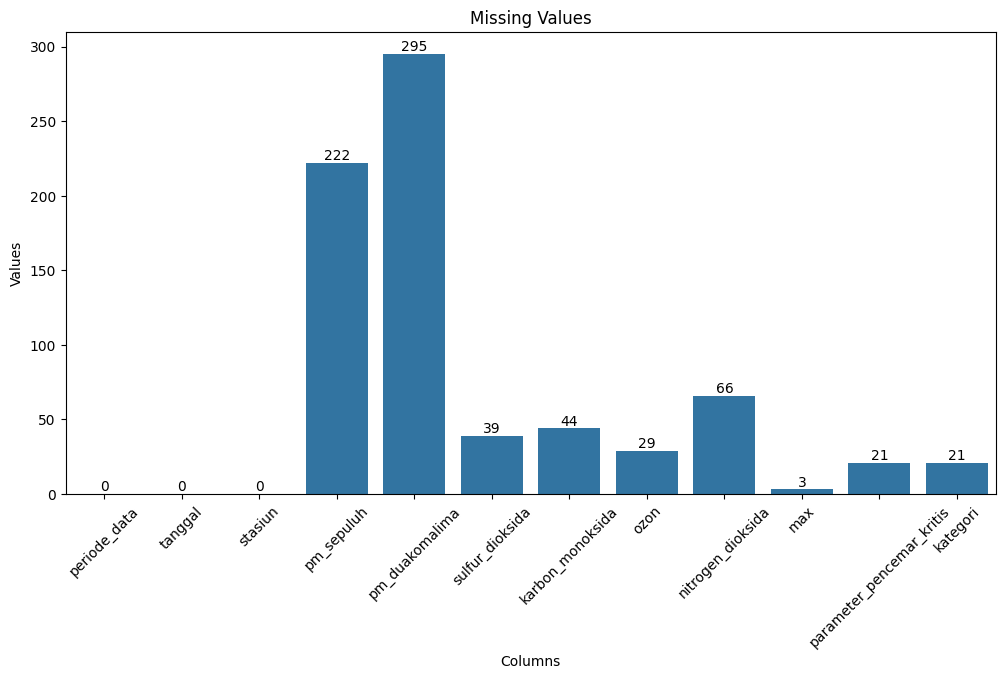

In [4]:
# Definisikan nilai missing yang kemungkinan terjadi
missing_values = ['', ' ', 'NaN', 'Nan', 'nan', '.', ',','-','--','---', 'TIDAK ADA DATA', 'KOSONG']
col_names = list(df.columns)
df[col_names] = df[col_names].replace(missing_values, np.nan)

# Hitung jumlah data yang kosong
missing_values = df.isnull().sum()
missing_values = pd.DataFrame(missing_values, columns=['count'])
missing_values.reset_index(inplace=True)

# Atur tampilan frame
plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x='index', y='count', data=missing_values)
plt.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Atur label dan judul frame
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Missing Values')

# Tampilkan diagram
plt.show()

### Cek Duplikasi Data

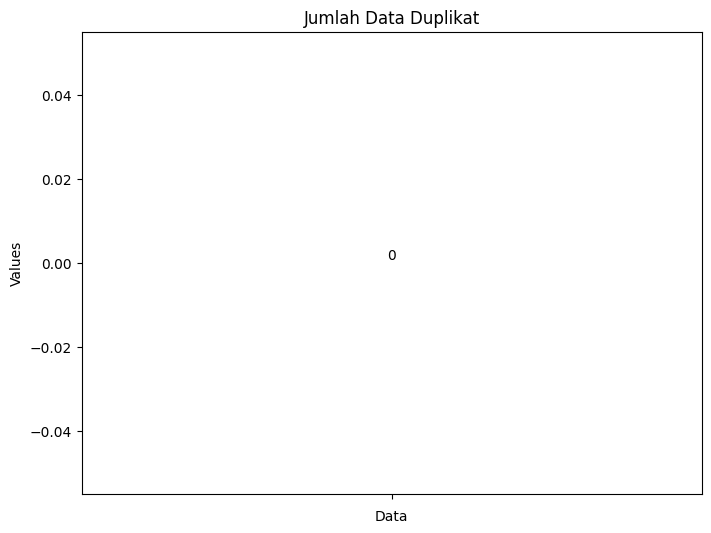

In [5]:
# Hitung jumlah data duplikat
Duplikat = df.duplicated().sum()

# Buat dataframe untuk data duplikat
cek_dup = {
    'Data Duplikat': [''],
    'Values': [Duplikat]
}
cek_dup = pd.DataFrame(cek_dup)

# Atur tampilan frame
plt.figure(figsize=(8, 6)) 
ax = sns.barplot(x='Data Duplikat', y='Values', data=cek_dup)
plt.bar_label(ax.containers[0])

# Atur label dan judul frame
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Jumlah Data Duplikat')

# Tamplikan diagram
plt.show()

### Melihat Distribusi *Attribute* Label (Kategori)

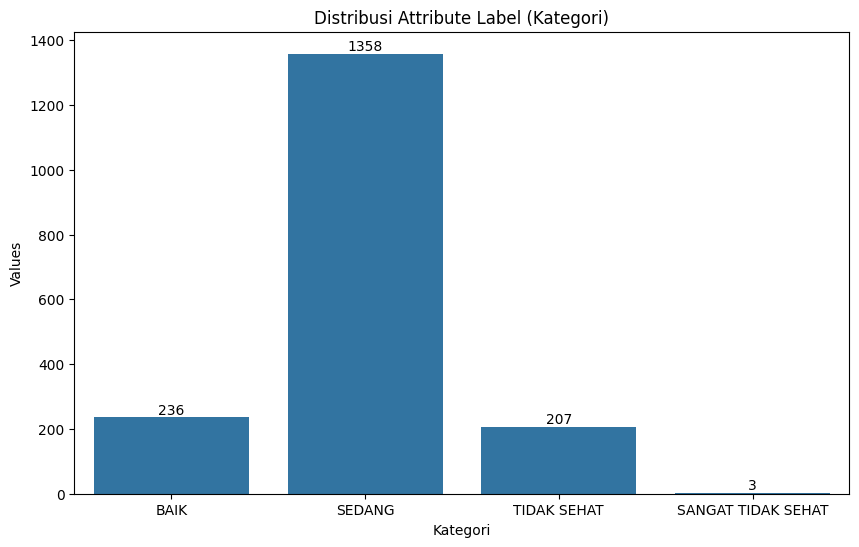

In [6]:
# Atur tampilan frame
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(data = df, x = "kategori")
ax.bar_label(ax.containers[0])

# Atur label dan judul frame
plt.xlabel('Kategori')
plt.ylabel('Values')
plt.title('Distribusi Attribute Label (Kategori)')

# Tampilkan diagram
plt.show()

In [7]:
data_tiga = df[df['kategori'] == 'TIDAK ADA DATA']
data_tiga

,periode_data,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori


### Melihat Distribusi *Attribute* Label (Kategori) Berdasarkan Stasiun Pemantauan

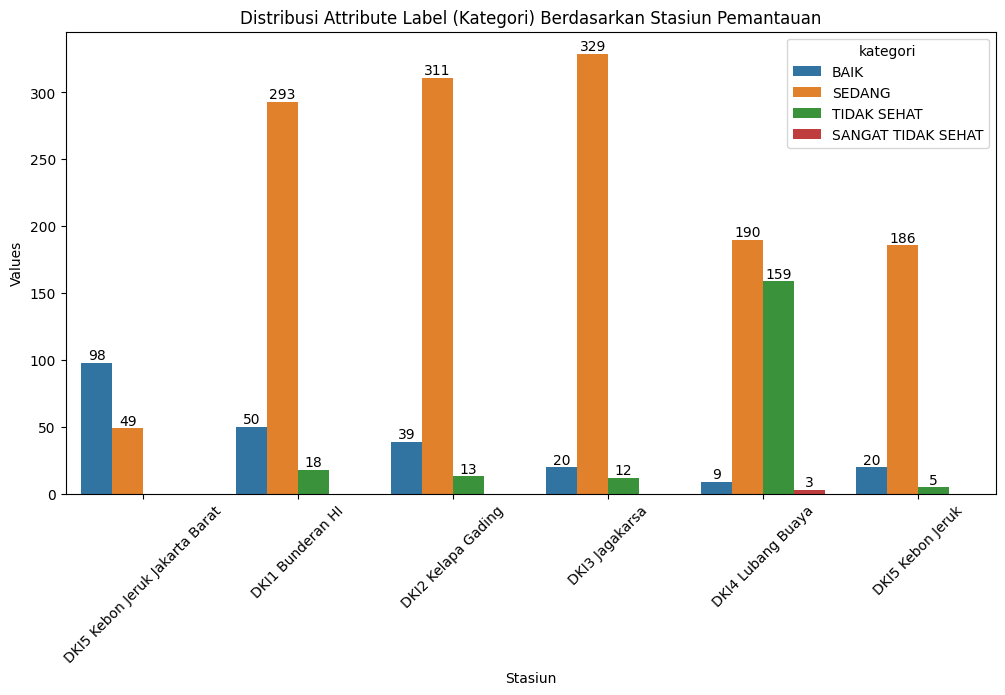

In [8]:
# Atur tampilan frame
plt.figure(figsize=(12, 6)) 
ax = sns.countplot(data = df, x = "stasiun", hue= "kategori")
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Atur label dan judul frame
plt.xlabel('Stasiun')
plt.ylabel('Values')
plt.title('Distribusi Attribute Label (Kategori) Berdasarkan Stasiun Pemantauan')

# Tampilkan diagram
plt.show()

### Melihat Distribusi *Attribute* Parameter Pencemar Kritis

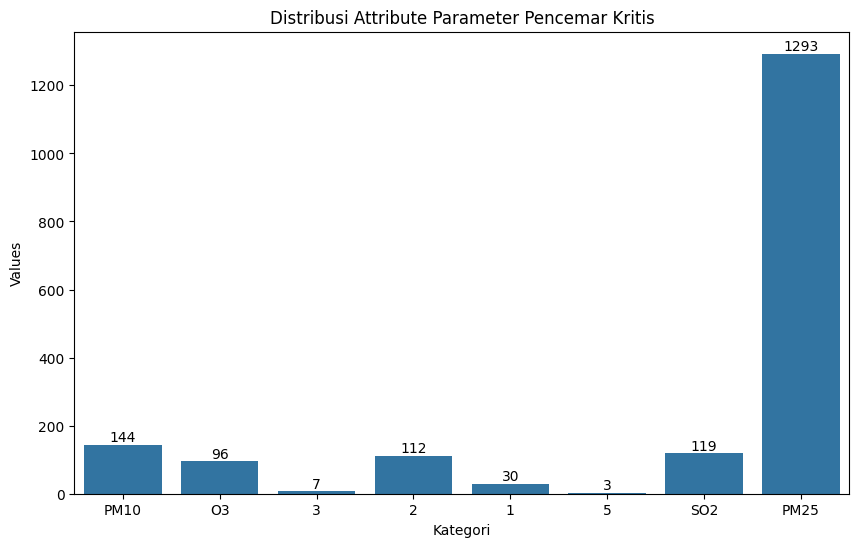

In [9]:
# Atur tampilan frame
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(data = df, x = "parameter_pencemar_kritis")
ax.bar_label(ax.containers[0])

# Atur label dan judul frame
plt.xlabel('Kategori')
plt.ylabel('Values')
plt.title('Distribusi Attribute Parameter Pencemar Kritis')

# Tampilkan diagram
plt.show()

### Melihat Distribusi *Attribute* Label (Kategori) Berdasarkan Parameter Pencemar Kritis

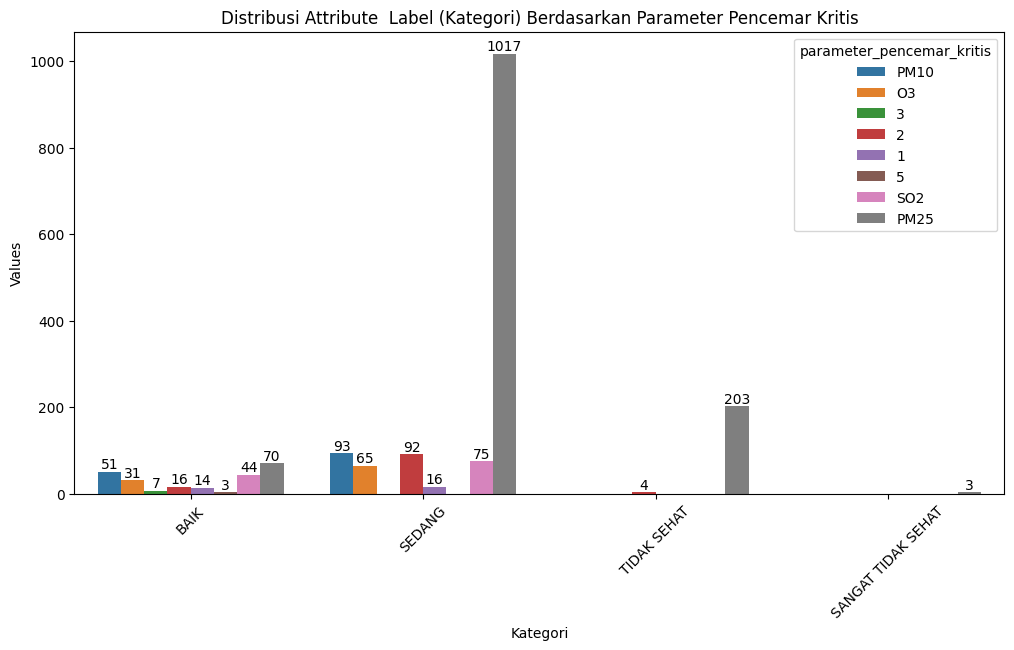

In [10]:
# Atur tampilan frame
plt.figure(figsize=(12, 6)) 
ax = sns.countplot(data = df, x = "kategori", hue= "parameter_pencemar_kritis")
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Atur label dan judul frame
plt.xlabel('Kategori')
plt.ylabel('Values')
plt.title('Distribusi Attribute  Label (Kategori) Berdasarkan Parameter Pencemar Kritis')

# Tampilkan diagram
plt.show()

### Melihat Distribusi *Attribute* Stasiun

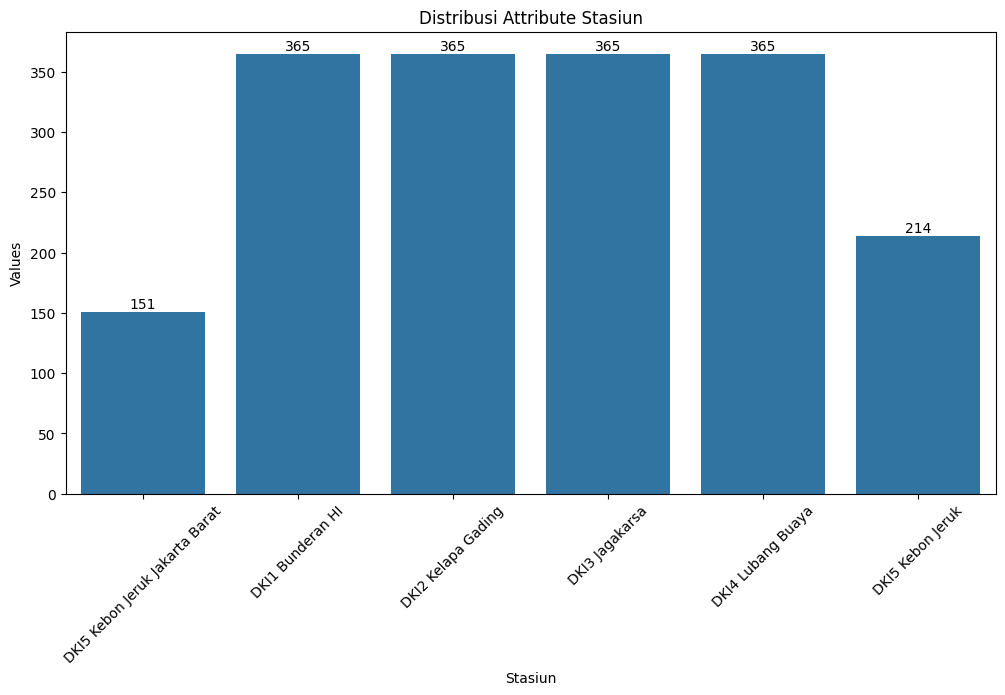

In [11]:
# Atur tampilan frame
plt.figure(figsize=(12, 6)) 
ax = sns.countplot(data = df, x = "stasiun")
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Atur label dan judul frame
plt.xlabel('Stasiun')
plt.ylabel('Values')
plt.title('Distribusi Attribute Stasiun')

# Tampilkan diagram
plt.show()

### Melihat Distribusi *Attribute* Parameter Pencemar Kritis Berdasarkan Stasiun Pemantauan

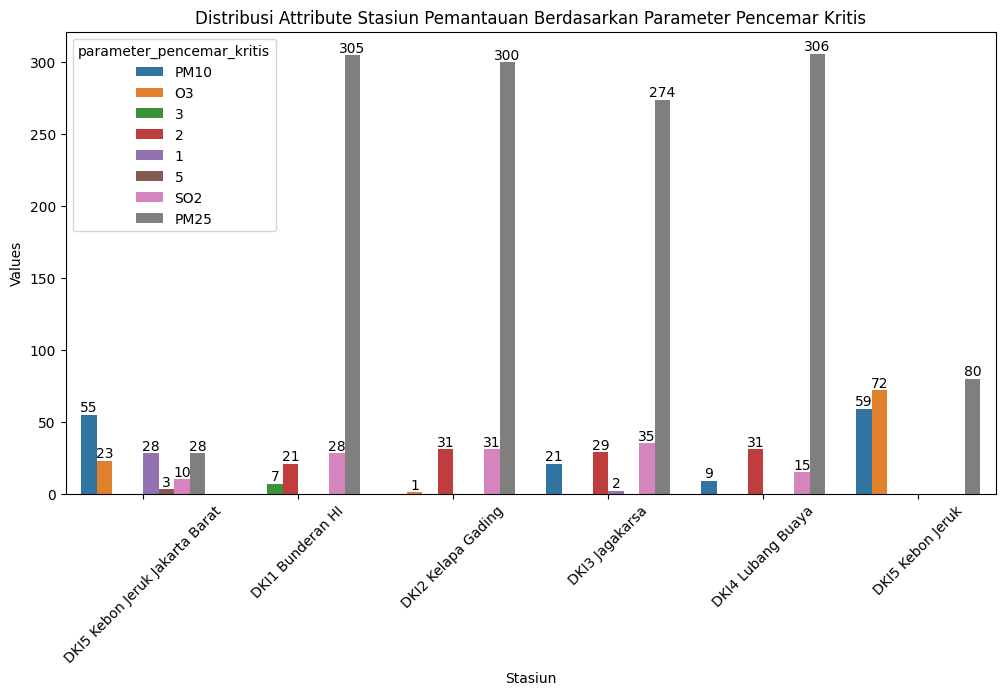

In [12]:
# Atur tampilan frame
plt.figure(figsize=(12, 6)) 
ax = sns.countplot(data = df, x = "stasiun", hue= "parameter_pencemar_kritis")
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Atur label dan judul frame
plt.xlabel('Stasiun')
plt.ylabel('Values')
plt.title('Distribusi Attribute Stasiun Pemantauan Berdasarkan Parameter Pencemar Kritis')

# Tampilkan diagram
plt.show()

### Melihat Kondisi Udara Tiap Bulan Sepanjang Tahun

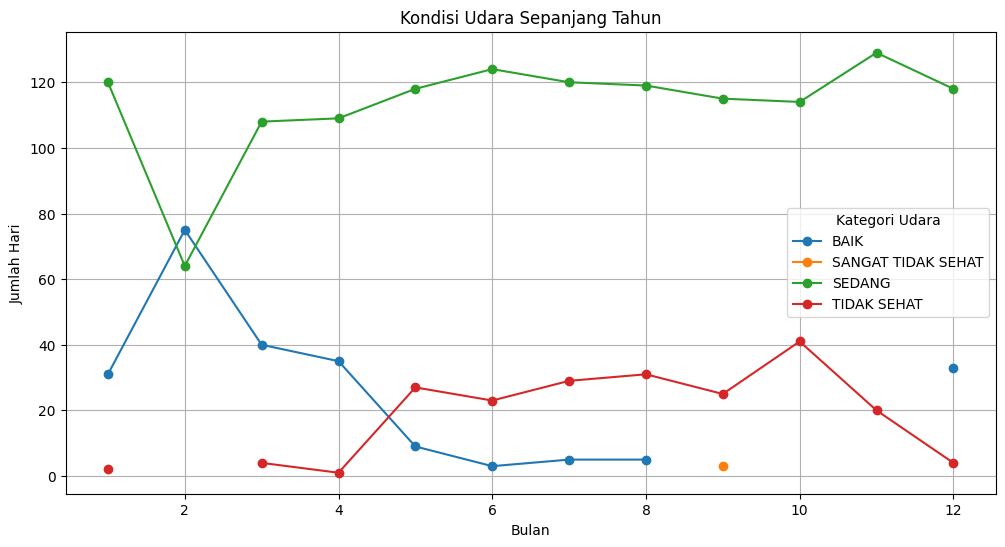

In [13]:
# Ubah format attribut tanggal menjadi datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# Tambah kolom bulan
df['bulan'] = df['tanggal'].dt.month

# Atur tampilan frame
rata_rata_per_bulan = df.groupby('bulan')['kategori'].value_counts().unstack()

# Atur jenis plot, label, dan judul frame
rata_rata_per_bulan.plot(kind='line', marker='o', figsize=(12,6))
plt.xlabel('Bulan')
plt.ylabel('Jumlah Hari')
plt.title('Kondisi Udara Sepanjang Tahun')
plt.legend(title='Kategori Udara')
plt.grid(True)

# Tampilkan diagram
plt.show()

## *Data Preparation*

### Label Selection

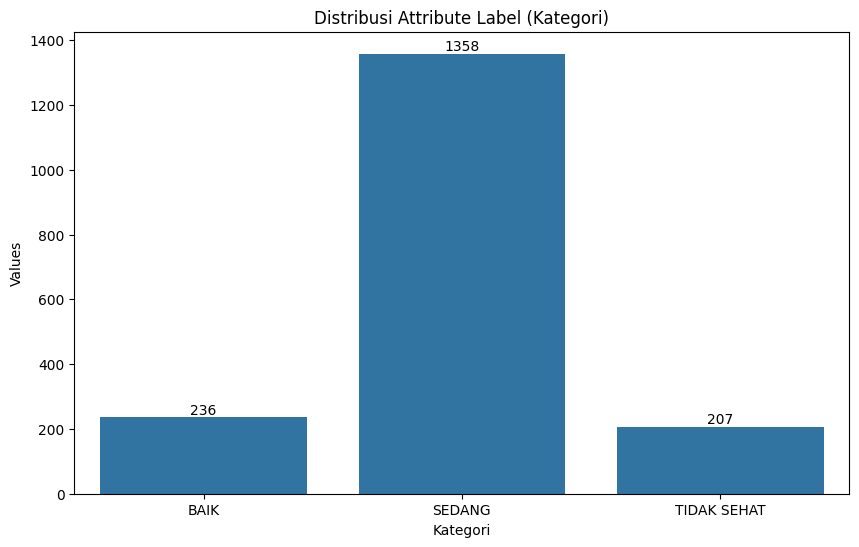

In [14]:
# Seleksi data pada attribute label
df.drop(df[df['kategori'] == 'SANGAT TIDAK SEHAT'].index, inplace=True)

# Atur tampilan frame
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(data = df, x = "kategori")
ax.bar_label(ax.containers[0])

# Atur label dan judul frame
plt.xlabel('Kategori')
plt.ylabel('Values')
plt.title('Distribusi Attribute Label (Kategori)')

# Tampilkan diagram
plt.show()

### Normalisasi Data

#### *Attribute* Stasiun

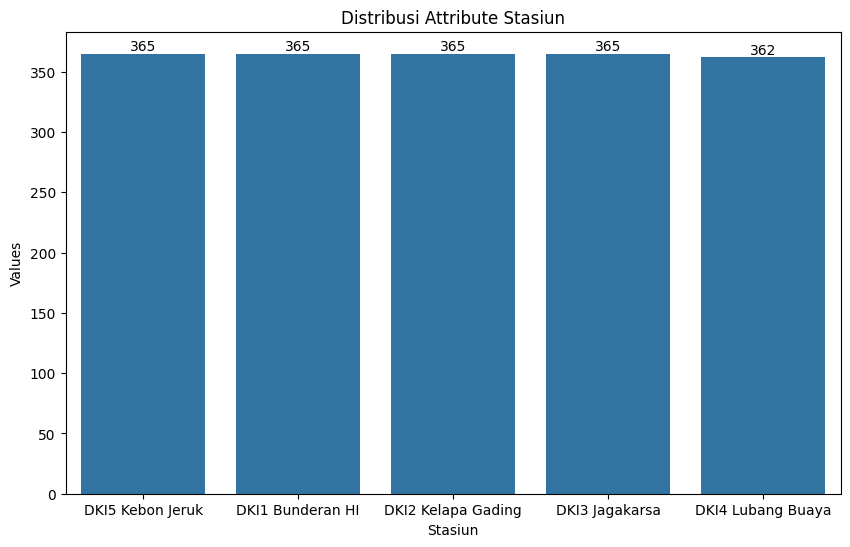

In [15]:
# Normalisasi data
df['stasiun'] = df['stasiun'].replace('DKI5 Kebon Jeruk Jakarta Barat', 'DKI5 Kebon Jeruk')

# Atur tampilan frame
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(data = df, x = "stasiun")
ax.bar_label(ax.containers[0])

# Atur label dan judul frame
plt.xlabel('Stasiun')
plt.ylabel('Values')
plt.title('Distribusi Attribute Stasiun')

# Tampilkan diagram
plt.show()

#### *Attribute* Parameter Pencemar Kritis

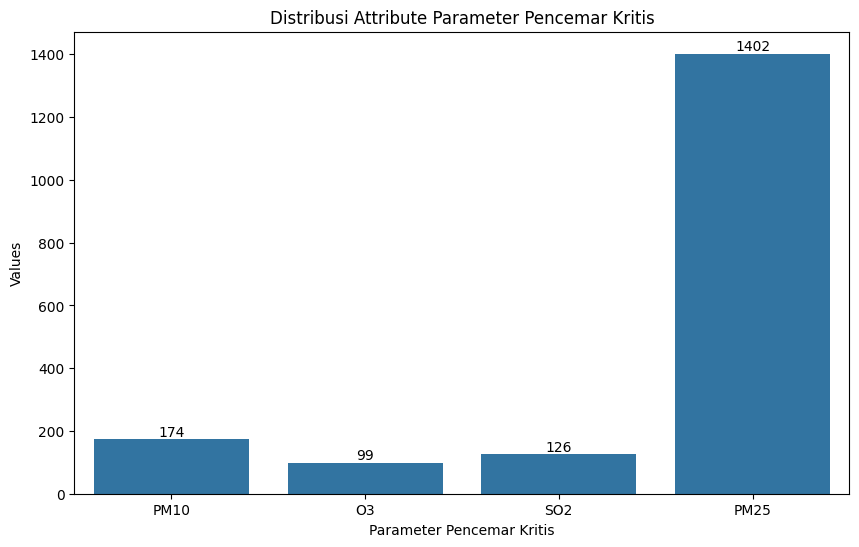

In [16]:
# Normalisasi data
df['parameter_pencemar_kritis'] = df['parameter_pencemar_kritis'].replace([1,2,3,5], ['PM10','PM25','SO2','O3'])

# Atur tampilan frame
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(data = df, x = "parameter_pencemar_kritis")
ax.bar_label(ax.containers[0])

# Atur label dan judul frame
plt.xlabel('Parameter Pencemar Kritis')
plt.ylabel('Values')
plt.title('Distribusi Attribute Parameter Pencemar Kritis')

# Tampilkan diagram
plt.show()

### Feature Selection

In [17]:
kolom = ['periode_data', 'tanggal', 'stasiun', 'parameter_pencemar_kritis', 'bulan']
df.drop(columns=kolom, axis=1, inplace=True)
df

,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,kategori
0,35.0,NaN,13.0,12.0,31.0,18.0,35.0,BAIK
1,23.0,NaN,14.0,9.0,32.0,11.0,32.0,BAIK
2,20.0,NaN,13.0,8.0,33.0,13.0,33.0,BAIK
3,30.0,NaN,21.0,11.0,28.0,18.0,30.0,BAIK
4,38.0,44.0,50.0,8.0,19.0,27.0,50.0,BAIK
...,...,...,...,...,...,...,...,...
1820,48.0,71.0,33.0,21.0,44.0,20.0,71.0,SEDANG
1821,51.0,76.0,32.0,18.0,53.0,19.0,76.0,SEDANG
1822,56.0,88.0,33.0,20.0,48.0,21.0,88.0,SEDANG
1823,56.0,88.0,32.0,18.0,56.0,18.0,88.0,SEDANG


### Hapus *Missing Values*

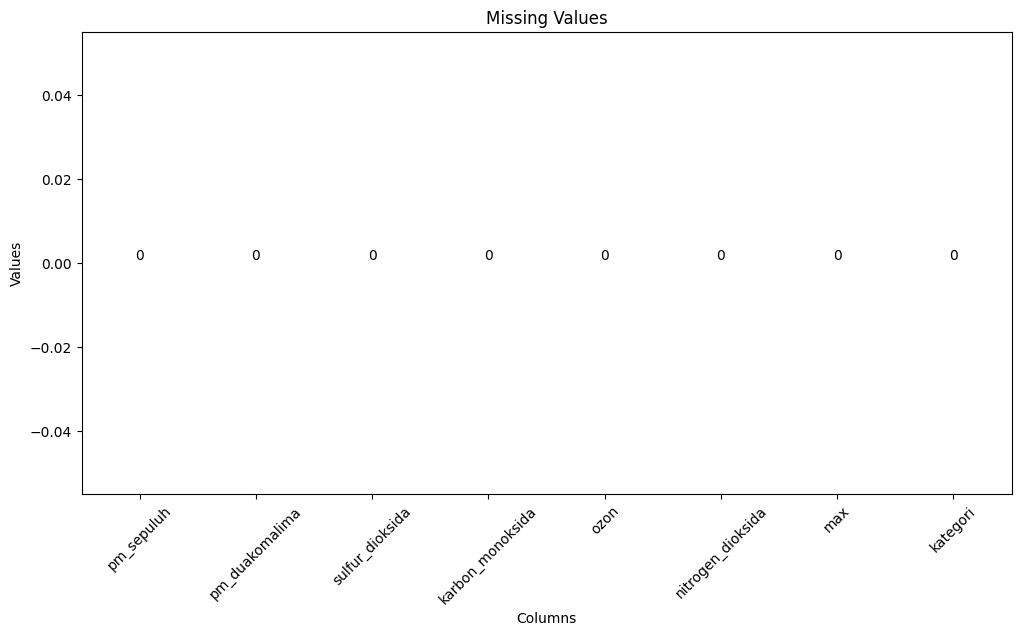

In [18]:
# Definisikan nilai missing yang kemungkinan terjadi
missing_values = ['', ' ', 'NaN', 'Nan', 'nan', '.', ',','-','--','---', 'TIDAK ADA DATA', 'KOSONG']
col_names = list(df.columns)
df[col_names] = df[col_names].replace(missing_values, np.nan)

# Hapus data kosong
df = df.dropna()

# Hitung jumlah data yang kosong
missing_values = df.isnull().sum()
missing_values = pd.DataFrame(missing_values, columns=['count'])
missing_values.reset_index(inplace=True)

# Atur tampilan frame
plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x='index', y='count', data=missing_values)
plt.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Atur label dan judul frame
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Missing Values')

# Tampilkan diagram
plt.show()

### Label Encoding

In [19]:
# Kolom Kategori
df['kategori'] = df['kategori'].replace(['BAIK', 'SEDANG', 'TIDAK SEHAT'],
                                        [1, 2, 3])
df

,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,kategori
4,38.0,44.0,50.0,8.0,19.0,27.0,50.0,1
5,29.0,33.0,47.0,11.0,21.0,27.0,47.0,1
6,38.0,46.0,49.0,9.0,16.0,25.0,49.0,1
8,33.0,41.0,47.0,11.0,21.0,22.0,47.0,1
9,31.0,44.0,46.0,9.0,20.0,19.0,46.0,1
...,...,...,...,...,...,...,...,...
1820,48.0,71.0,33.0,21.0,44.0,20.0,71.0,2
1821,51.0,76.0,32.0,18.0,53.0,19.0,76.0,2
1822,56.0,88.0,33.0,20.0,48.0,21.0,88.0,2
1823,56.0,88.0,32.0,18.0,56.0,18.0,88.0,2


### *Synthetic Minority Oversampling Technique (SMOTE)*

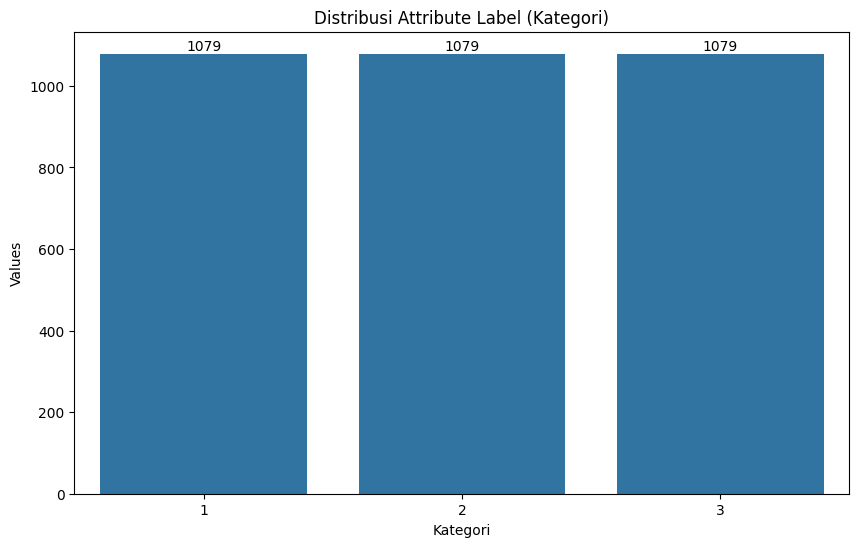

In [20]:
#SMOTE
smote = SMOTE(k_neighbors=3,random_state=42)
X, y= smote.fit_resample(df.iloc[:,:-1], df.iloc[:,-1:])

# Gabungkan hasil SMOTE
df = pd.concat([X, y], axis=1)

# Atur tampilan frame
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(data = df, x = "kategori")
ax.bar_label(ax.containers[0])

# Atur label dan judul frame
plt.xlabel('Kategori')
plt.ylabel('Values')
plt.title('Distribusi Attribute Label (Kategori)')

# Tampilkan diagram
plt.show()

### Hapus Data Duplikat

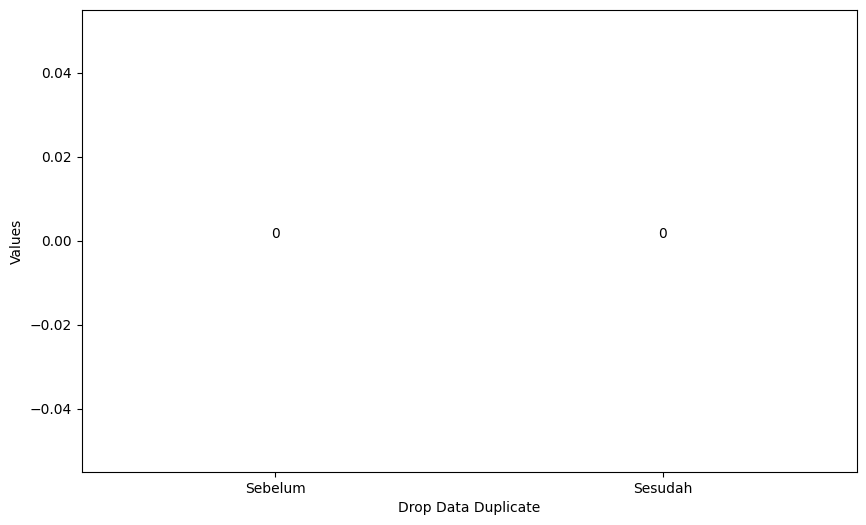

In [21]:
# Definisikan data duplikat
sebelum = df.duplicated().sum()
df = df.drop_duplicates()
sesudah = df.duplicated().sum()

# Buat dictionary untuk menyimpan data dari variable di atas
drop_dup = {
    'Drop Data Duplicate': ['Sebelum', 'Sesudah'],
    'Values': [sebelum,sesudah],
}

# Buat dataframe dari dictionary di atas
drop_dup = pd.DataFrame(drop_dup)

# Atur tampilan frame
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(x='Drop Data Duplicate', y='Values', data=drop_dup)
plt.bar_label(ax.containers[0])

# Tampilkan Diagram
plt.show()

## Modelling

### Pembagian Data Training Dan Data Testing

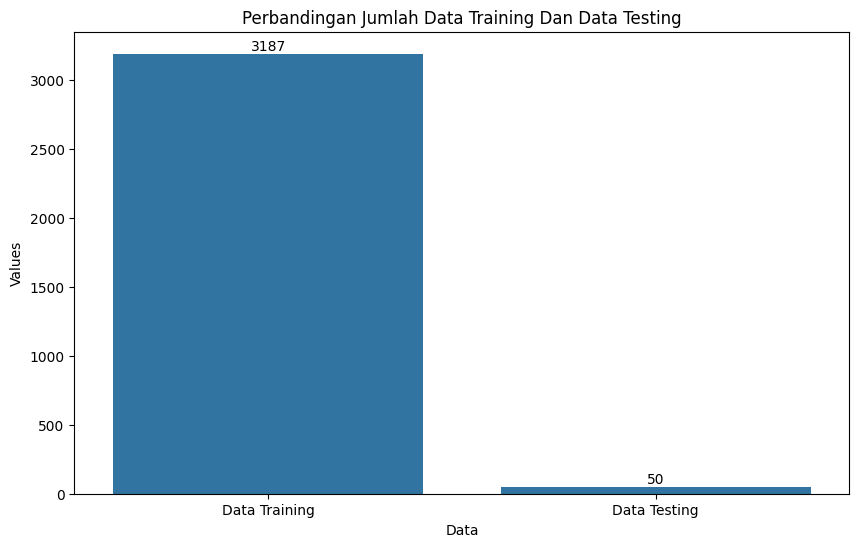

In [22]:
# Bagi data training and testing
df_train, df_test = train_test_split(df, test_size = 0.0152, random_state = 42, stratify = df.iloc[:,-1:])

# Simpan Data
joblib.dump(df, '/home/riyan/Tugas_Akhir/Data/df_clean.joblib')
joblib.dump(df_train, '/home/riyan/Tugas_Akhir/Data/df_train.joblib')
joblib.dump(df_test, '/home/riyan/Tugas_Akhir/Data/df_test.joblib')

# Buat dictionary
data_split = {
    'Spliting_Data': ['Data Training', 'Data Testing'],
    'Values': [len(df_train),len(df_test)],
}

# Membuat Dataframe dari dictionary di atas
data_split = pd.DataFrame(data_split)

# Atur frame
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(x='Spliting_Data', y='Values', data=data_split)
plt.bar_label(ax.containers[0])

# Atur label dan judul frame
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Perbandingan Jumlah Data Training Dan Data Testing')

# Tampilkan diagram
plt.show()

### Random Forest Classifier

In [23]:
# Model
RF = RandomForestClassifier()

# K-Fold 10
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True)

# Proses training
CV_RF = cross_validate(RF, 
                       df_train.iloc[:,:-1], 
                       df_train.iloc[:,-1:], 
                       cv=stratified_cv, 
                       scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], 
                       return_train_score=True,
                       return_estimator=True)

## Evaluasi Model

### Data Validation

In [24]:
print("\t\t\tEvaluasi Data Validation\n\n")
print("Accuracy: ", CV_RF['test_accuracy'])
print("Mean Accuracy: ", np.mean(CV_RF['test_accuracy']))
print("\n")
print("Precision: ", CV_RF['test_precision_weighted'])
print("Mean Precision: ", np.mean(CV_RF['test_precision_weighted']))
print("\n")
print("Recall: ", CV_RF['test_recall_weighted'])
print("Mean Recall: ", np.mean(CV_RF['test_recall_weighted']))
print("\n")
print("F1: ", CV_RF['test_f1_weighted'])
print("Mean F1: ", np.mean(CV_RF['test_f1_weighted']))
print("\n")

			Evaluasi Data Validation


Accuracy:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy:  1.0


Precision:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Precision:  1.0


Recall:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Recall:  1.0


F1:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean F1:  1.0




### Data Training

In [25]:
print("\t\t\tEvaluasi Data Training\n\n")
print("Accuracy: ", CV_RF['train_accuracy'])
print("Mean Accuracy: ", np.mean(CV_RF['train_accuracy']))
print("\n")
print("Precision: ", CV_RF['train_precision_weighted'])
print("Mean Precision: ", np.mean(CV_RF['train_precision_weighted']))
print("\n")
print("Recall: ", CV_RF['train_recall_weighted'])
print("Mean Recall: ", np.mean(CV_RF['train_recall_weighted']))
print("\n")
print("F1: ", CV_RF['train_f1_weighted'])
print("Mean F1: ", np.mean(CV_RF['train_f1_weighted']))
print("\n")

			Evaluasi Data Training


Accuracy:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy:  1.0


Precision:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Precision:  1.0


Recall:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Recall:  1.0


F1:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean F1:  1.0




### Simpan Model

In [26]:
# Pilih model terbaik
select_model = CV_RF['estimator'][0]

# Simpan model
joblib.dump(CV_RF, '/home/riyan/Tugas_Akhir/Models/Model.joblib')
joblib.dump(select_model, '/home/riyan/Tugas_Akhir/Models/Best_Model.joblib')

['/home/riyan/Tugas_Akhir/Models/Best_Model.joblib']